### 语言模型

In [1]:
# 马尔科夫模型与n元语法

In [3]:
#我是中国人
#T=5,w1,w2,w3,w4,w5
#语言模型的目的就是评估该序列是否合理
#怎么评估，计算该序列的概率
#p(w1,w2,w3,w4,w5) = p(我)p(是|我)p(中|我，是)p(国|我，是，中)p(人|我，是，中，国)
#p(我是中国人) > p（我是中华人）

In [ ]:
#马尔科夫假设：一个词的出现只与前面的N个词相关，n阶马尔科夫链
#你先走和你走先 在1元语法中概率相同

#### n元语法的缺点:
- 参数空间过大
- 数据会比较稀疏


In [4]:
#齐夫定律：在一个自然语言语料库中，某个单词出现的频率与其在频率表中名词的常数次幂成反比
#极少数的单词会被经常使用到，绝大多数单词很少被提及

In [40]:
#词汇表类
class Vocab:
    def __init__(self,tokens=None,min_freq=0,reserved_token=None):
        if tokens is None:
            tokens = []
        if reserved_token is None:
            reserved_token = []
        #按照出现的频率进行排序
        counter = count_conpus(tokens)
        self.token_freqs = sorted(counter.items(),key=lambda x: x[1],reverse=True)
        #未知的词元索引为0
        self.unk,uniq_tokens = 0,['<unk>'] + reserved_token
        uniq_tokens += [token for token,freq in self.token_freqs if freq >= min_freq and tokens not in uniq_tokens]
        self.idx_to_token,self.token_to_idx = [],dict()
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token]=len(self.idx_to_token) - 1
    def __len__(self):
        return len(self.idx_to_token)
    def __getitem__(self,tokens):
        if not isinstance(tokens,(list,tuple)):
            return self.token_to_idx.get(tokens,self.unk)
        return [self.__getitem__(token) for token in tokens]
    def to_tokens(self,indices):
        if not isinstance(indices,(list,tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

In [7]:
import collections
import re

In [8]:
def read_time_mechaine():
    with open('./The Echo of a Dying Star.txt','r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+',' ',line).strip().lower() for line in lines]

In [10]:
def tokenize(lines,token='word'):
    if token == 'word':
        return [line.split() for line in lines]
    elif token=='char':
        return [list(line) for line in lines]
    else:
        print('错误，未知词元类型:'+token)

In [12]:
#统计词元频率
def count_conpus(tokens):
    if len(tokens) == 0 or isinstance(tokens[0],list):
        #把词元列表展平成使用词元填充的一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [17]:
# 整合所有的功能
def load_corpus_time_machine(max_tokens=-1):
    """返回时光机器文本数据集中的词元索引和词汇表"""
    lines = read_time_mechaine()
    tokens = tokenize(lines,'char')
    vocab = Vocab(tokens)
    #把所有文本行展平到一个列表
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus,vocab

In [18]:
lines = read_time_mechaine()
tokens = tokenize(lines,'char')

In [19]:
#把所有文本行拼接到一起
corpus = [token for line in tokens for token in line]
#词汇表
vocab = Vocab(corpus)

In [41]:
vocab.token_freqs

[(' ', 1063),
 ('e', 677),
 ('t', 499),
 ('a', 435),
 ('i', 386),
 ('n', 344),
 ('s', 342),
 ('r', 330),
 ('o', 304),
 ('h', 253),
 ('l', 213),
 ('d', 186),
 ('c', 163),
 ('u', 119),
 ('g', 117),
 ('w', 109),
 ('f', 105),
 ('p', 102),
 ('m', 92),
 ('y', 87),
 ('b', 63),
 ('v', 56),
 ('k', 46),
 ('q', 6),
 ('x', 5),
 ('j', 5),
 ('z', 2)]

In [21]:
#取出所有的词频
freqs = [freq for token,freq in vocab.token_freqs]

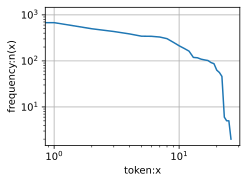

In [22]:
import d2l.torch as d2l
d2l.plot(freqs,xlabel='token:x',ylabel='frequency:n(x)',xscale='log',yscale='log')

In [27]:
#二院语法 bi_grams
bigram_tokens = [pair for pair in zip(corpus[:-1],corpus[1:])]
bigram_tokens

[('t', 'i'),
 ('i', 't'),
 ('t', 'l'),
 ('l', 'e'),
 ('e', ' '),
 (' ', 't'),
 ('t', 'h'),
 ('h', 'e'),
 ('e', ' '),
 (' ', 'e'),
 ('e', 'c'),
 ('c', 'h'),
 ('h', 'o'),
 ('o', ' '),
 (' ', 'o'),
 ('o', 'f'),
 ('f', ' '),
 (' ', 'a'),
 ('a', ' '),
 (' ', 'd'),
 ('d', 'y'),
 ('y', 'i'),
 ('i', 'n'),
 ('n', 'g'),
 ('g', ' '),
 (' ', 's'),
 ('s', 't'),
 ('t', 'a'),
 ('a', 'r'),
 ('r', 'i'),
 ('i', 'n'),
 ('n', ' '),
 (' ', 't'),
 ('t', 'h'),
 ('h', 'e'),
 ('e', ' '),
 (' ', 'y'),
 ('y', 'e'),
 ('e', 'a'),
 ('a', 'r'),
 ('r', ' '),
 (' ', 'h'),
 ('h', 'u'),
 ('u', 'm'),
 ('m', 'a'),
 ('a', 'n'),
 ('n', 'i'),
 ('i', 't'),
 ('t', 'y'),
 ('y', ' '),
 (' ', 'h'),
 ('h', 'a'),
 ('a', 'd'),
 ('d', ' '),
 (' ', 's'),
 ('s', 't'),
 ('t', 'r'),
 ('r', 'e'),
 ('e', 't'),
 ('t', 'c'),
 ('c', 'h'),
 ('h', 'e'),
 ('e', 'd'),
 ('d', ' '),
 (' ', 'i'),
 ('i', 't'),
 ('t', 's'),
 ('s', ' '),
 (' ', 'r'),
 ('r', 'e'),
 ('e', 'a'),
 ('a', 'c'),
 ('c', 'h'),
 ('h', ' '),
 (' ', 'a'),
 ('a', 'c'),
 ('c', 'r'),

In [47]:
#词汇表
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs

[(('e', ' '), 237),
 ((' ', 't'), 165),
 (('t', 'h'), 152),
 (('h', 'e'), 144),
 (('t', ' '), 122),
 ((' ', 'a'), 117),
 (('i', 'n'), 113),
 (('s', ' '), 111),
 ((' ', 's'), 107),
 (('d', ' '), 102),
 (('r', 'e'), 85),
 ((' ', 'i'), 84),
 (('i', 't'), 82),
 ((' ', 'w'), 76),
 (('n', ' '), 74),
 (('e', 'r'), 71),
 (('a', 'r'), 66),
 (('a', ' '), 65),
 (('e', 'd'), 65),
 (('r', ' '), 63),
 ((' ', 'o'), 62),
 (('n', 'g'), 62),
 (('e', 'n'), 57),
 (('s', 't'), 56),
 (('a', 't'), 54),
 (('y', ' '), 53),
 (('a', 'n'), 52),
 (('g', ' '), 50),
 (('t', 'e'), 50),
 (('w', 'a'), 50),
 ((' ', 'c'), 48),
 ((' ', 'b'), 46),
 ((' ', 'f'), 46),
 ((' ', 'd'), 43),
 (('a', 's'), 43),
 (('l', 'e'), 42),
 ((' ', 'e'), 41),
 (('o', 'r'), 41),
 (('f', ' '), 40),
 (('r', 'i'), 40),
 (('o', 'n'), 40),
 (('t', 'a'), 39),
 (('n', 'e'), 39),
 (('n', 't'), 39),
 (('o', ' '), 38),
 (('o', 'f'), 38),
 (('e', 'a'), 36),
 (('t', 'i'), 35),
 ((' ', 'r'), 35),
 (('a', 'l'), 35),
 ((' ', 'p'), 34),
 (('s', 'i'), 32),
 (

In [48]:
#三元语法 trigram_grams
trigram_tokens = [pair for pair in zip(corpus[:-1],corpus[1:-2],corpus[2:])]
#词汇表
trigram_vocab = Vocab(trigram_tokens)

In [49]:
# 对比一元，二元，三元语法
bigram_freqs = [freq for token,freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token,freq in trigram_vocab.token_freqs]

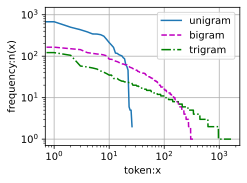

In [50]:
d2l.plot([freqs,bigram_freqs,trigram_freqs],
         xlabel='token:x',ylabel='frequency:n(x)',xscale='log',yscale='log',
        legend=['unigram','bigram','trigram'])